In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df_headers = ['molecule_name', 'conformation_name'] + [f'f{i}' for i in range(1, 167)] + ['class']
df_train = pd.read_csv('clean2.data', delimiter=',', names=df_headers)
df_test = pd.read_csv('clean1.data', delimiter=',', names=df_headers)

In [93]:
X_train = df_train.drop(columns=['molecule_name', 'conformation_name', 'class'])
y_train = df_train['class'].to_numpy()
X_test = df_test.drop(columns=['molecule_name', 'conformation_name', 'class'])
y_test = df_test['class'].to_numpy()

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [127]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [141]:
def compute_cost(X, y, w, b=0):
    n_samples, _ = X.shape
    w = w.reshape(-1, 1)

    z = X@w + b
    a = sigmoid(z.reshape(-1))
    loss = -y*np.log(a) - (1-y)*np.log(1-a)
    total_cost = np.sum(loss) / n_samples
    
    return total_cost

In [132]:
def compute_gradient(X, y, w, b=0):
    n_samples, _ = X.shape
    dw = np.zeros(w.shape)
    db = 0.
    w = w.reshape(-1, 1)

    z = X@w + b
    a = sigmoid(z.reshape(-1))
    err = a - y

    dw = np.sum(err.reshape(-1,1)*X, axis=0) / n_samples
    db = np.sum(err) / n_samples

    return dw, db

In [139]:
def logistic_regression(X, y, learning_rate, num_iterations, add_intercept=True):
    _, n_features = X.shape

    cost_history = np.zeros(num_iterations, dtype=np.float64) # cost history
    w, b = np.zeros(n_features), 0. # parameters

    for iter in range(num_iterations):
        dw, db = compute_gradient(X, y, w, b)
        w -= learning_rate*dw
        b -= learning_rate*db if add_intercept else 0
        cost_history[iter] = compute_cost(X, y, w, b)
        
        if (iter+1) % (num_iter//10) == 0:
            print(f'iteration {iter+1:>5}/{num_iterations},\tcost: {cost_history[iter]:>9.5f}')

    return w, b, cost_history

In [159]:
def predict(X, w, b, threshold=0.5):
    w = w.reshape(-1, 1)
    z = X@w + b
    a = sigmoid(z.reshape(-1))
    pred = (a >= threshold)
    
    return pred.astype(float)

In [170]:
def score(y_true, y_pred):
    n_samples = y_true.shape
    score = np.sum(y_pred == y_true) / n_samples
    
    return score.item()

iteration   100/1000,	cost:   0.51671
iteration   200/1000,	cost:   0.43227
iteration   300/1000,	cost:   0.37932
iteration   400/1000,	cost:   0.34309
iteration   500/1000,	cost:   0.31689
iteration   600/1000,	cost:   0.29715
iteration   700/1000,	cost:   0.28181
iteration   800/1000,	cost:   0.26956
iteration   900/1000,	cost:   0.25957
iteration  1000/1000,	cost:   0.25127


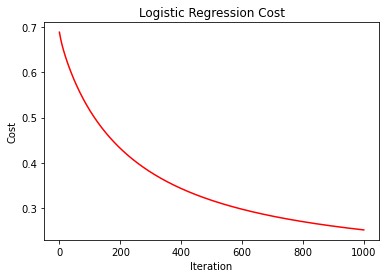

In [174]:
num_iter = 1000
lr = 0.01

W_final, b_final, h = logistic_regression(X_train, y_train, lr, num_iter)

plt.plot(list(range(num_iter)), h, c='red')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title(f'Logistic Regression Cost')
plt.show()

In [175]:
y_pred = predict(X_test, W_final, b_final)
score(y_test, y_pred)

0.7121848739495799